In [3]:
from modules.client import OffVarianceClient
import modules.utils as utils
from pandas import DataFrame
from dotenv import dotenv_values

config = dotenv_values('../.env')

client = OffVarianceClient(config.get('OFF_VARIANCE_KEY'), data_path='../data')
games_df = client.get_finished_games()

games_df = utils.filter_correct_games(games_df)
utils.populate_metrics(games_df)

In [4]:
segmented_df = games_df.loc[
(games_df['team1_home_classic_minutes'] >= 90 * 3) & (games_df['team2_away_classic_minutes'] >= 90 * 3) &
(games_df['odds_open_win2'] >= 1.8) & (games_df['odds_open_win2'] <= 2.7) &
(games_df['odds_open_tb25'] >= 2.0) & (games_df['odds_open_tb25'] <= 2.5)
]

Count: 4738
Open profit: 16.61999999999999
Close profit: -62.81000000000003
Open ROI: 0.003507809202195017
Close ROI: -0.013256648374841713
UDI: 0.01396630645759904
AxesSubplot(0.125,0.125;0.775x0.755)


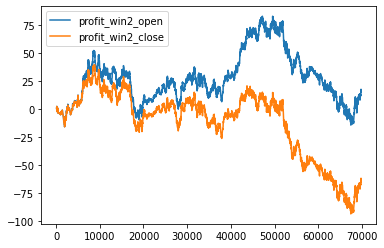

In [5]:
utils.print_away_win_result(segmented_df)

In [6]:
utils.analyze_correlation(segmented_df, 'difference', utils.metrics)

,correlation
expected_difference,0.098441
expected_difference_loc,0.081457
simple_expected_difference,0.058840
simple_expected_difference_loc,0.041403
expected_total_loc,-0.019119
simple_expected_total_value,0.015004
simple_expected_total_value_loc,-0.005479
expected_total,-0.001256


In [7]:
utils.analyze_avg_udi(segmented_df, utils.metrics, 'udi_win2')

,low,high,diff
expected_difference_loc,-0.285251,-0.497635,0.212383
expected_difference,-0.253292,-0.460581,0.207290
simple_expected_difference,-0.262485,-0.377439,0.114953
simple_expected_difference_loc,-0.056388,-0.168474,0.112087
expected_total_loc,2.192318,2.269360,0.077042
expected_total,2.183711,2.259127,0.075416
simple_expected_total_value,4.562383,4.632183,0.069800
simple_expected_total_value_loc,4.508855,4.555991,0.047136


In [8]:
updated_segmented_df = segmented_df.loc[
(segmented_df['expected_difference_loc'] <= -0.46) & (segmented_df['expected_difference'] <= -0.49)
]

utils.analyze_avg_udi(updated_segmented_df, [
    'expected_difference_loc',
    'expected_difference',
], 'udi_win2')

,low,high,diff
expected_difference,-0.772127,-0.833030,0.060903
expected_difference_loc,-0.971068,-0.991442,0.020374


Count: 261
Open profit: 25.360000000000003
Close profit: 10.459999999999997
Open ROI: 0.09716475095785441
Close ROI: 0.04007662835249041
UDI: 0.06110514894502354
AxesSubplot(0.125,0.125;0.775x0.755)


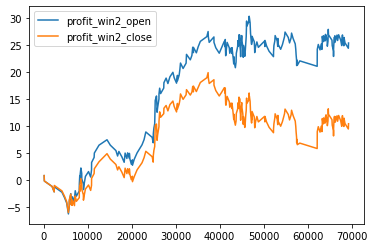

In [9]:
filtered_result_df = segmented_df.loc[
(segmented_df['expected_difference'] <= -0.83) & (segmented_df['expected_difference_loc'] <= -0.99)
]
utils.print_away_win_result(filtered_result_df)